In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [2]:
zip_lon_lat = pd.read_csv('ma_zip-lon-lat.csv')
zip_lon_lat.head()

,zip_code,latitude,longitude
0,1001,42.062368,-72.625754
1,1002,42.364061,-72.458739
2,1003,42.389941,-72.524108
3,1005,42.418848,-72.106598
4,1007,42.279010,-72.400468


In [3]:
features = ["latitude","longitude"]
X = zip_lon_lat[features]
number_of_counties = 14

In [4]:
kmeans = KMeans( init="random", n_clusters=number_of_counties,random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

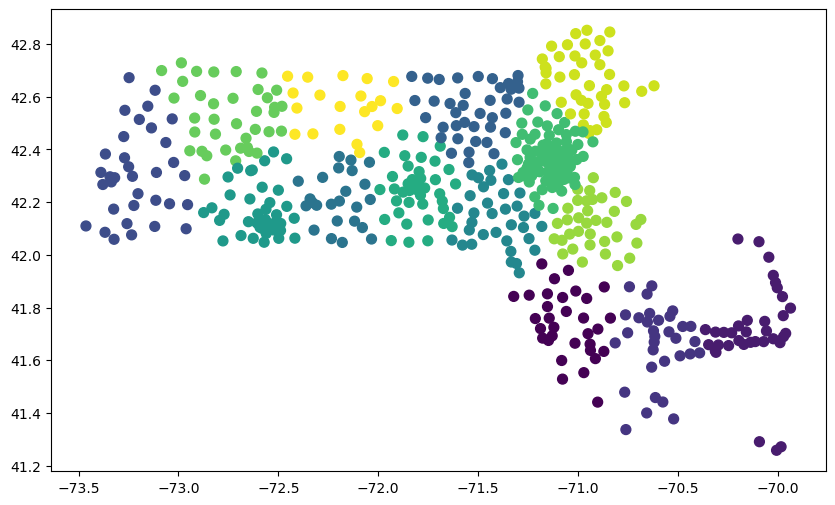

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X["longitude"], X["latitude"], c=y_kmeans, s=50, cmap='viridis')

In [6]:
zip_lon_lat['county'] = y_kmeans.tolist()
zip_lon_lat.head()

,zip_code,latitude,longitude,county
0,1001,42.062368,-72.625754,7
1,1002,42.364061,-72.458739,7
2,1003,42.389941,-72.524108,7
3,1005,42.418848,-72.106598,13
4,1007,42.279010,-72.400468,5


In [7]:
zip_lon_lat.to_csv('county.csv')

In [8]:
zip_lon_lat.groupby(['county'])['county'].count()

county
0     32
1     35
2     32
3     34
4     39
5     24
6     35
7     39
8     40
9     94
10    37
11    35
12    41
13    20
Name: county, dtype: int64

In [9]:
outliers_df = pd.read_csv('outliers.csv')
outliers_df.drop(columns=["Unnamed: 0"],inplace=True)

In [10]:
merged_df = pd.merge(outliers_df, zip_lon_lat, how='inner', on="zip_code")
merged_df.tail()

,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,latitude,longitude,county
454,1.0,1.0,0.17,2657.0,280.0,2019-04-12,449000.0,42.059829,-70.200407,1
455,2.0,1.0,0.17,2657.0,420.0,2021-09-02,559000.0,42.059829,-70.200407,1
456,3.0,3.0,0.35,2657.0,2820.0,2018-09-28,1499000.0,42.059829,-70.200407,1
457,2.0,1.0,0.23,2723.0,612.0,2021-11-02,149000.0,41.692705,-71.129726,0
458,3.0,1.0,0.13,2724.0,1270.0,2016-06-30,399000.0,41.683936,-71.177500,0


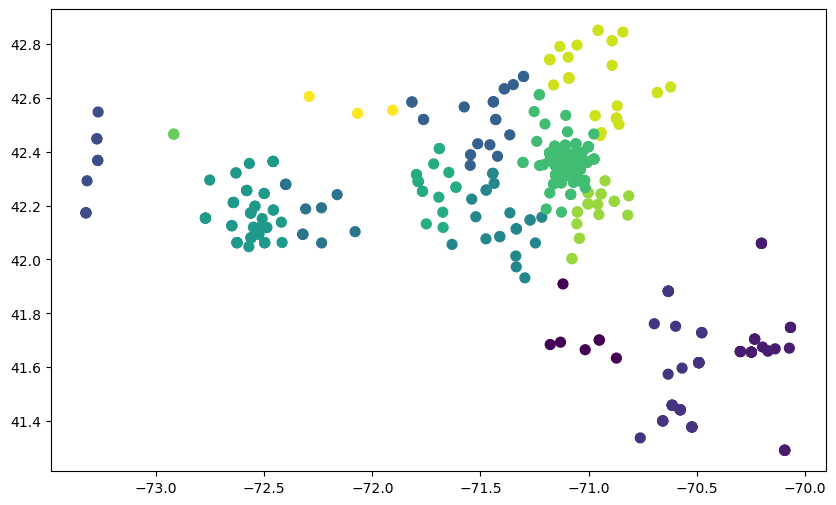

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(merged_df["longitude"],merged_df["latitude"], c=merged_df["county"], s=50, cmap='viridis')

In [12]:
outliers_df.groupby(["zip_code"])["zip_code"].count()

zip_code
1001.0    4
1002.0    4
1007.0    3
1020.0    4
1022.0    2
         ..
2745.0    2
2747.0    1
2760.0    1
2762.0    1
2780.0    1
Name: zip_code, Length: 197, dtype: int64